In [53]:
#This exercise was made following chapter 3 Deep Learning with Python

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
import tensorflow as tf

In [37]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

In [12]:
from keras.datasets import imdb

In [13]:
imdb

<module 'keras.datasets.imdb' from 'C:\\Users\\14168\\Anaconda3\\lib\\site-packages\\keras\\datasets\\imdb.py'>

In [19]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [40]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [35]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [41]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [43]:
model.compile(optimizer= 'rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [44]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.5344 - acc: 0.7746 - val_loss: 0.3943 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.3181 - acc: 0.8973 - val_loss: 0.3277 - val_acc: 0.8713
Epoch 3/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.2343 - acc: 0.9245 - val_loss: 0.2862 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1844 - acc: 0.9400 - val_loss: 0.2745 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1526 - acc: 0.9509 - val_loss: 0.2996 - val_acc: 0.8806
Epoch 6/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1225 - acc: 0.9625 - val_loss: 0.2882 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.1070 - acc: 0.9658 - val_loss: 0.3037 - 

In [49]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21) #This should have been range(1, len(acc)+1) - but got error



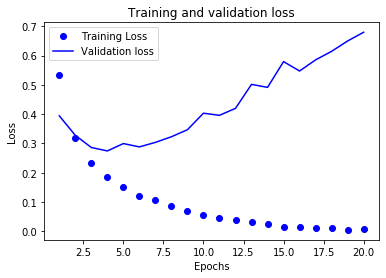

In [52]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()